In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
batch_size = 25

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# データをトレーニングセットとテストセットに80 : 20で分割
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

A = tf.Variable(tf.random_normal(shape=[1,1]))

In [2]:
# 計算グラフに演算を追加
my_output = tf.matmul(x_data, A)

# L2損失関数を追加
loss = tf.reduce_mean(tf.square(my_output - y_target))

# 最適化関数を作成
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# 変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

In [3]:
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #25 A = [[ 6.2873168]]
Loss = 15.3083
Step #50 A = [[ 8.63401031]]
Loss = 2.90935
Step #75 A = [[ 9.50001144]]
Loss = 0.866701
Step #100 A = [[ 9.80193043]]
Loss = 0.902769


In [4]:
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:1.58
MSE on train:1.0


In [5]:
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25

x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# データをトレーニングセットとテストセットに80 : 20 で分割
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [6]:
# 計算グラフに演算を追加
my_output = tf.add(x_data, A)

# 損失関数を追加
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))

# 最適化関数を作成
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# 変数を初期化
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [ 4.88035011]
Loss = 2.42143
Step #400 A = [ 0.97286844]
Loss = 0.365512
Step #600 A = [-0.29008558]
Loss = 0.262741
Step #800 A = [-0.63367754]
Loss = 0.257695
Step #1000 A = [-0.68409497]
Loss = 0.283134
Step #1200 A = [-0.68252271]
Loss = 0.215744
Step #1400 A = [-0.69719326]
Loss = 0.324399
Step #1600 A = [-0.67375594]
Loss = 0.181439
Step #1800 A = [-0.70209575]
Loss = 0.37024


In [8]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.95
Accuracy on test set: 1.0


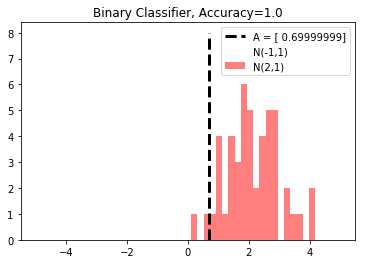

In [9]:
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='white')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()